In [115]:

import csv
import numpy
import datatables

primary=[]
with open('Data/primary_results.csv', 'rb') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=',', quotechar='\'')
     i=0
     for row in spamreader:
        if i>0:
            primary.append(row)
        else:
            pheader=row
        i=i+1
        
facts=[]
with open('Data/county_facts.csv', 'rb') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=',', quotechar='\'')
     i=0
     for row in spamreader:
        if i>0:
            facts.append(row)
        else:
            fheader=row
        i=i+1
        
        
dicto=[]
with open('Data/county_facts_dictionary.csv', 'rb') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
     i=0
     for row in spamreader:
        if i>0:
            dicto.append(row)
        i=i+1

In [116]:
for f in range(len(pheader)):
    print pheader[f]+"\t"+"\t"+"\t"+primary[0][f]

state			Alabama
state_abbreviation			AL
county			Autauga
fips			1001.0
party			Democrat
candidate			Bernie Sanders
votes			544
fraction_votes			0.182


In [117]:
fheader_dict=[]
for f in range(len(fheader)):
    meaning=""
    for h in range(len(dicto)):
        if dicto[h][0]==fheader[f]:
            meaning=dicto[h][1]
    if meaning=="":
        fheader_dict.append(fheader[f])
    else:
        fheader_dict.append(meaning)
    print fheader[f]+"\t"+"\t"+"\t"+facts[2][f]+"\t"+"\t"+meaning

fips			1001		
area_name			Autauga County		
state_abbreviation			AL		
PST045214			55395		Population, 2014 estimate
PST040210			54571		Population, 2010 (April 1) estimates base
PST120214			1.5		Population, percent change - April 1, 2010 to July 1, 2014
POP010210			54571		Population, 2010
AGE135214			6.0		Persons under 5 years, percent, 2014
AGE295214			25.2		Persons under 18 years, percent, 2014
AGE775214			13.8		Persons 65 years and over, percent, 2014
SEX255214			51.4		Female persons, percent, 2014
RHI125214			77.9		White alone, percent, 2014
RHI225214			18.7		Black or African American alone, percent, 2014
RHI325214			0.5		American Indian and Alaska Native alone, percent, 2014
RHI425214			1.1		Asian alone, percent, 2014
RHI525214			0.1		Native Hawaiian and Other Pacific Islander alone, percent, 2014
RHI625214			1.8		Two or More Races, percent, 2014
RHI725214			2.7		Hispanic or Latino, percent, 2014
RHI825214			75.6		White alone, not Hispanic or Latino, percent, 2014
POP715213			85.0		L

In [118]:
import pandas as pd
fact=pd.DataFrame(facts, columns=fheader_dict)
prim=pd.DataFrame(primary, columns=pheader)

In [119]:
all=pd.merge(fact, prim, how='inner', on='fips', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
print all

Empty DataFrame
Columns: [fips, area_name, state_abbreviation_x, Population, 2014 estimate, Population, 2010 (April 1) estimates base, Population, percent change - April 1, 2010 to July 1, 2014, Population, 2010, Persons under 5 years, percent, 2014, Persons under 18 years, percent, 2014, Persons 65 years and over, percent, 2014, Female persons, percent, 2014, White alone, percent, 2014, Black or African American alone, percent, 2014, American Indian and Alaska Native alone, percent, 2014, Asian alone, percent, 2014, Native Hawaiian and Other Pacific Islander alone, percent, 2014, Two or More Races, percent, 2014, Hispanic or Latino, percent, 2014, White alone, not Hispanic or Latino, percent, 2014, Living in same house 1 year & over, percent, 2009-2013, Foreign born persons, percent, 2009-2013, Language other than English spoken at home, pct age 5+, 2009-2013, High school graduate or higher, percent of persons age 25+, 2009-2013, Bachelor's degree or higher, percent of persons age 25+

In [120]:
print fact

       fips           area_name state_abbreviation Population, 2014 estimate  \
0         0       United States                                    318857056   
1      1000             Alabama                                      4849377   
2      1001      Autauga County                 AL                     55395   
3      1003      Baldwin County                 AL                    200111   
4      1005      Barbour County                 AL                     26887   
5      1007         Bibb County                 AL                     22506   
6      1009       Blount County                 AL                     57719   
7      1011      Bullock County                 AL                     10764   
8      1013       Butler County                 AL                     20296   
9      1015      Calhoun County                 AL                    115916   
10     1017     Chambers County                 AL                     34076   
11     1019     Cherokee County         

In [121]:
print prim

         state state_abbreviation                county        fips  \
0      Alabama                 AL               Autauga      1001.0   
1      Alabama                 AL               Autauga      1001.0   
2      Alabama                 AL               Baldwin      1003.0   
3      Alabama                 AL               Baldwin      1003.0   
4      Alabama                 AL               Barbour      1005.0   
5      Alabama                 AL               Barbour      1005.0   
6      Alabama                 AL                  Bibb      1007.0   
7      Alabama                 AL                  Bibb      1007.0   
8      Alabama                 AL                Blount      1009.0   
9      Alabama                 AL                Blount      1009.0   
10     Alabama                 AL               Bullock      1011.0   
11     Alabama                 AL               Bullock      1011.0   
12     Alabama                 AL                Butler      1013.0   
13    

In [122]:
prim[['fips']] = prim[['fips']].apply(pd.to_numeric)
fact[['fips']] = fact[['fips']].apply(pd.to_numeric)
all=pd.merge(prim, fact, how='inner', on='fips', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)


In [123]:
Bernie=all[all.candidate=='Bernie Sanders']

In [124]:
y=pd.DataFrame(Bernie['fraction_votes'])

In [125]:
print fheader
fh_feat=fheader_dict[3:]
print fh_feat
X=pd.DataFrame(Bernie[fh_feat])

['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210', 'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210']
['Population, 2014 estimate', 'Population, 2010 (April 1) estimates base', 'Population, percent change - April 1, 2010 to July 1, 2014', 'Population, 2010', 'Persons under 5 years, percent, 2014', 'Persons under 18 years, percent, 2014', 'Persons 65 years and over, percent, 2014', 'Female per

In [126]:
X=X.convert_objects(convert_numeric=True)
y=y.convert_objects(convert_numeric=True)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [127]:
X = (X - X.mean()) / (X.std())


In [128]:
print X

       Population, 2014 estimate  Population, 2010 (April 1) estimates base  \
0                      -0.146507                                  -0.144980   
7                       0.298066                                   0.265196   
14                     -0.234085                                  -0.232075   
21                     -0.247544                                  -0.246651   
28                     -0.139368                                  -0.136143   
35                     -0.283615                                  -0.285210   
42                     -0.254333                                  -0.252989   
49                      0.039415                                   0.060648   
56                     -0.212000                                  -0.210511   
63                     -0.236696                                  -0.236800   
70                     -0.181725                                  -0.180121   
77                     -0.275754                    

In [77]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import random

decimals=np.linspace(0,1,100)
decimals=decimals[5:]
trainings=[]
tests=[]
tests2=[]

tests3=[]
tests4=[]
tests5=[]
for a in [1, 5, 13]:
    training=[]
    test=[]
    test2=[]
    test3=[]
    test4=[]
    test5=[]
    print a
    for u in decimals:
        ts=0
        xs=0
        xs2=0
        xs3=0
        xs4=0
        xs5=0
        for seeds in [5642,75543,44654,4427,43311, 9511, 3543, 7665, 45367, 14454]:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=seeds)
            X_train = X_train[: int(len(X_train) * u)]
            y_train = y_train[: int(len(y_train) * u)]
            regr = DecisionTreeRegressor(max_depth=a)
            regr.fit(X_train, y_train)
            ts=ts+regr.score(X_train, y_train)/10
            xs=xs+regr.score(X_test, y_test)/10
            X_train.reset_index(drop=True, inplace=True)
            for seedo in [7653,5664,3486,1987,974,3641,8642,8741,2736,6657]:
                numpy.random.seed(seed=seedo)
                X_train2=X_train.add(pd.DataFrame(np.random.normal(0,0.01,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train3=X_train.add(pd.DataFrame(np.random.normal(0,0.01,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train2.append(X_train)
                X_train2.append(X_train3)
                y_train.append(y_train)
                y_train.append(y_train)
                regr.fit(X_train2, y_train)            
                xs2=xs2+regr.score(X_test, y_test)/100
                X_train2=X_train.add(pd.DataFrame(np.random.normal(0,0.1,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train3=X_train.add(pd.DataFrame(np.random.normal(0,0.1,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train2.append(X_train)
                X_train2.append(X_train3)
                regr.fit(X_train2, y_train)            
                xs3=xs3+regr.score(X_test, y_test)/100
                X_train2=X_train.add(pd.DataFrame(np.random.normal(0,0.1,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train3=X_train.add(pd.DataFrame(np.random.normal(0,0.1,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train4=X_train.add(pd.DataFrame(np.random.normal(0,0.1,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train5=X_train.add(pd.DataFrame(np.random.normal(0,0.1,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train6=X_train.add(pd.DataFrame(np.random.normal(0,0.1,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train7=X_train.add(pd.DataFrame(np.random.normal(0,0.1,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train2.append(X_train)
                X_train2.append(X_train3)
                X_train2.append(X_train4)
                X_train2.append(X_train5)
                X_train2.append(X_train6)
                X_train2.append(X_train7)
                y_train.append(y_train)
                y_train.append(y_train)
                y_train.append(y_train)
                y_train.append(y_train)
                regr.fit(X_train2, y_train)            
                xs4=xs4+regr.score(X_test, y_test)/100
                X_train2=X_train.add(pd.DataFrame(np.random.normal(0,0.01,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train3=X_train.add(pd.DataFrame(np.random.normal(0,0.01,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train4=X_train.add(pd.DataFrame(np.random.normal(0,0.01,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train5=X_train.add(pd.DataFrame(np.random.normal(0,0.01,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train6=X_train.add(pd.DataFrame(np.random.normal(0,0.01,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train7=X_train.add(pd.DataFrame(np.random.normal(0,0.01,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train2.append(X_train)
                X_train2.append(X_train3)
                X_train2.append(X_train4)
                X_train2.append(X_train5)
                X_train2.append(X_train6)
                X_train2.append(X_train7)
                regr.fit(X_train2, y_train)            
                xs5=xs5+regr.score(X_test, y_test)/100
        training.append(ts) 
        test.append(xs)
        test2.append(xs2)
        test3.append(xs3)
        test4.append(xs4)
        test5.append(xs5)
    trainings.append(training)
    tests.append(test)
    tests2.append(test2)
    tests3.append(test3)
    tests4.append(test4)
    tests5.append(test5)

1
5
13


In [68]:
print X_train3

      Population, 2014 estimate  Population, 2010 (April 1) estimates base  \
0                      2.745722                                   3.220354   
1                      2.168873                                   1.423044   
2                      0.462231                                   0.513674   
3                     -1.154736                                  -0.410695   
4                      4.503853                                   3.244131   
5                      0.743836                                   0.504651   
6                     -0.757687                                  -0.201480   
7                      0.111532                                  -1.819687   
8                      0.187174                                  -0.665849   
9                      1.311107                                   1.131784   
10                    -2.218117                                  -0.291490   
11                     0.901689                                 

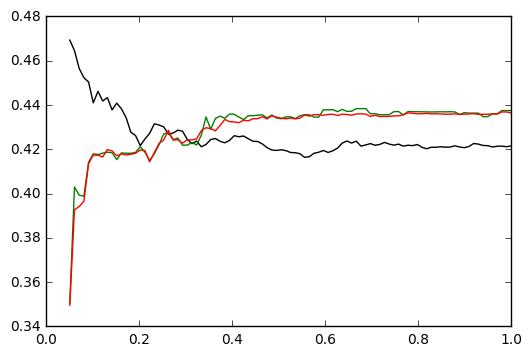

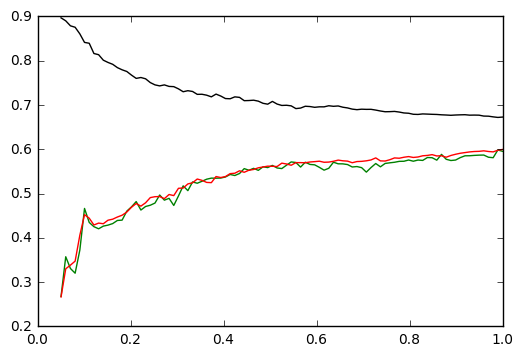

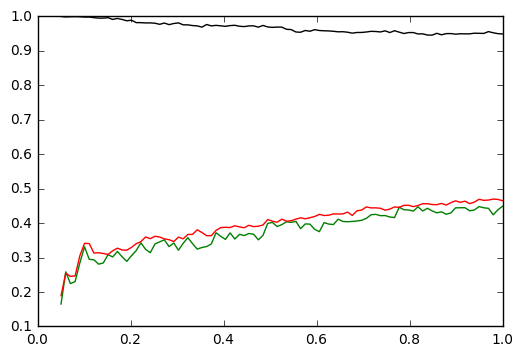

In [92]:
import numpy as np
import matplotlib.pyplot as plt

for a in [0, 1, 2]:
    line, = plt.plot(decimals, trainings[a], linewidth=1, color='black')
    line, = plt.plot(decimals, tests[a], linewidth=1, color='green')
    line, = plt.plot(decimals, tests2[a], linewidth=1, color='red')
    #line, = plt.plot(decimals, tests3[a], linewidth=1, color='gray')
    #line, = plt.plot(decimals, tests4[a], linewidth=1, color='gray')
    #line, = plt.plot(decimals, tests5[a], linewidth=1, color='blue')
    plt.show()



In [ ]:
4*3

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import random

decimals=np.linspace(0,1,50)
decimals=decimals[5:]
trainings=[]
tests=[]
tests2=[]

tests3=[]
tests4=[]
tests5=[]
for a in [1]:
    print a
    training=[]
    test=[]
    test2=[]
    test3=[]
    test4=[]
    test5=[]
    for u in decimals:
        print u
        ts=0
        xs=0
        xs2=0
        xs3=0
        xs4=0
        xs5=0
        for seeds in [5642,75543,44654,4427,43311, 9511, 3543, 7665, 45367, 14454]:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=seeds)
            X_train = X_train[: int(len(X_train) * u)]
            y_train = y_train[: int(len(y_train) * u)]
            regr = SVR(kernel='poly', degree=a)
            regr.fit(X_train, y_train.values.ravel())
            ts=ts+regr.score(X_train, y_train.values.ravel())/10
            xs=xs+regr.score(X_test, y_test.values.ravel())/10
            
            X_train.reset_index(drop=True, inplace=True)
            for seedo in [7653,5664,3486,1987,974,3641,8642,8741,2736,6657]:
                numpy.random.seed(seed=seedo)
                X_train2=X_train.add(pd.DataFrame(np.random.normal(0,0.2,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train3=X_train.add(pd.DataFrame(np.random.normal(0,0.2,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
                X_train2.append(X_train)
                X_train2.append(X_train3)
                y_train.append(y_train)
                y_train.append(y_train)
                regr.fit(X_train2, y_train.values.ravel())            
                xs2=xs2+regr.score(X_test, y_test.values.ravel())/100
         
        training.append(ts) 
        test.append(xs)
        test2.append(xs2)


    trainings.append(training)
    tests.append(test)
    tests2.append(test2)


1
0.102040816327
0.122448979592
0.142857142857
0.163265306122
0.183673469388
0.204081632653
0.224489795918
0.244897959184
0.265306122449
0.285714285714
0.30612244898
0.326530612245
0.34693877551
0.367346938776
0.387755102041
0.408163265306
0.428571428571
0.448979591837
0.469387755102
0.489795918367
0.510204081633
0.530612244898
0.551020408163
0.571428571429
0.591836734694
0.612244897959
0.632653061224
0.65306122449
0.673469387755
0.69387755102
0.714285714286
0.734693877551
0.755102040816
0.775510204082
0.795918367347
0.816326530612
0.836734693878
0.857142857143
0.877551020408
0.897959183673
0.918367346939
0.938775510204
0.959183673469
0.979591836735
1.0


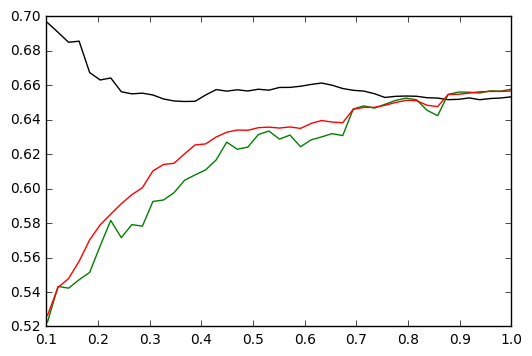

In [32]:
import numpy as np
import matplotlib.pyplot as plt

for a in [0]:
    line, = plt.plot(decimals, trainings[a], linewidth=1, color='black')
    line, = plt.plot(decimals, tests[a], linewidth=1, color='green')
    line, = plt.plot(decimals, tests2[a], linewidth=1, color='red')
    plt.show()


In [33]:
numpy.random.seed(seed=44353452)
X_train2=X_train.add(pd.DataFrame(np.random.normal(0,0.3,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))
X_train3=X_train.add(pd.DataFrame(np.random.normal(0,0.3,size=[len(X_train), len(X_train.columns)]), columns=X_train.columns))


In [199]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from operator import add

def neighbors_expand(Set, Sol, k):
    nbrs=NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(Set)
    distances, indices=nbrs.kneighbors(Set)
    newset=[]
    newsol=[]
    m=0
    while m<len(Set):
        a=1
        while a<len(indices[m]):
            #o=map(add, Set[m], Set[indices[m][a]])
            o=Set.iloc[m].add(Set.iloc[indices[m][a]])
            o = [float(x) / 2 for x in o]
            s=Sol.iloc[m].add(Sol.iloc[indices[m][a]])
            s = [float(x) / 2 for x in s]
            newset.append(o)
            newsol.append(s)
            a=a+1
        m=m+1
    return [newset, newsol]



def neighbors_expand_arr(Set, Sol, nsn):
    nbrs=NearestNeighbors(n_neighbors=max(nsn), algorithm='ball_tree').fit(Set)
    distances, indices=nbrs.kneighbors(Set)
    newset=[]
    newsol=[]
    pairs=[]
    for k in nsn:
        m=0
        while m<len(Set):
            a=1
            while a<k:
                o=Set.iloc[m].add(Set.iloc[indices[m][a]])
                o = [float(x) / 2 for x in o]
                s=Sol.iloc[m].add(Sol.iloc[indices[m][a]])
                s = [float(x) / 2 for x in s]
                newset.append(o)
                newsol.append(s)
                a=a+1
            m=m+1
        pairs.append([newset, newsol])
    return pairs
    

In [156]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import random

decimals=np.linspace(0,1,100)
decimals=decimals[5:]
seeds=[5642,75543,44654,4427,43311, 9511, 3543, 7665, 45367, 14454]
depths=[1,4,5,6,7,8,13]
degrees=[0,1, 2]
scores=np.zeros((2,len(decimals),len(depths),3))
j=0
k=0
for u in decimals:
    print u
    for seed in seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=seed)
        X_train = X_train[: int(len(X_train) * u)]
        y_train = y_train[: int(len(y_train) * u)]
        X_train.reset_index(drop=True, inplace=True)
        [X_train2, y_train2]=neighbors_expand(X_train, y_train, 3)
        X_train2=pd.DataFrame(X_train2)
        y_train2=pd.DataFrame(y_train2)
        X_train2.append(X_train)
        y_train2.append(y_train)
        k=0
        for a in depths:
            regr = DecisionTreeRegressor(max_depth=a)            
            regr.fit(X_train, y_train)
            scores[0,j,k,0]=scores[0,j,k,0]+regr.score(X_train, y_train)/10
            scores[0,j,k,1]=scores[0,j,k,1]+regr.score(X_test, y_test)/10
            regr.fit(X_train2, y_train2)            
            scores[0,j,k,2]=scores[0,j,k,2]+regr.score(X_test, y_test)/10
            k=k+1
        k=0
        for a in degrees:
            regr = SVR(kernel='poly', degree=a)            
            regr.fit(X_train, y_train)
            scores[1, j,k,0]=scores[1,j,k,0]+regr.score(X_train, y_train)/10
            scores[1, j,k,1]=scores[1,j,k,1]+regr.score(X_test, y_test)/10
            regr.fit(X_train2, y_train2)            
            scores[1, j,k,2]=scores[1,j,k,2]+regr.score(X_test, y_test)/10
            k=k+1
    j=j+1

0.0505050505051
0.0606060606061
0.0707070707071
0.0808080808081
0.0909090909091
0.10101010101
0.111111111111
0.121212121212
0.131313131313
0.141414141414
0.151515151515
0.161616161616
0.171717171717
0.181818181818
0.191919191919
0.20202020202
0.212121212121
0.222222222222
0.232323232323
0.242424242424
0.252525252525
0.262626262626
0.272727272727
0.282828282828
0.292929292929
0.30303030303
0.313131313131
0.323232323232
0.333333333333
0.343434343434
0.353535353535
0.363636363636
0.373737373737
0.383838383838
0.393939393939
0.40404040404
0.414141414141
0.424242424242
0.434343434343
0.444444444444
0.454545454545
0.464646464646
0.474747474747
0.484848484848
0.494949494949
0.505050505051
0.515151515152
0.525252525253
0.535353535354
0.545454545455
0.555555555556
0.565656565657
0.575757575758
0.585858585859
0.59595959596
0.606060606061
0.616161616162
0.626262626263
0.636363636364
0.646464646465
0.656565656566
0.666666666667
0.676767676768
0.686868686869
0.69696969697
0.707070707071
0.717171717

Mejora para max_depth: 1


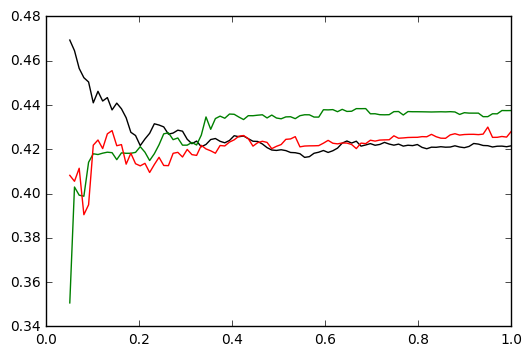

Mejora para max_depth: 4


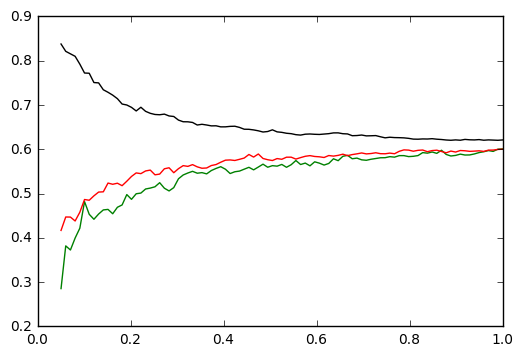

Mejora para max_depth: 5


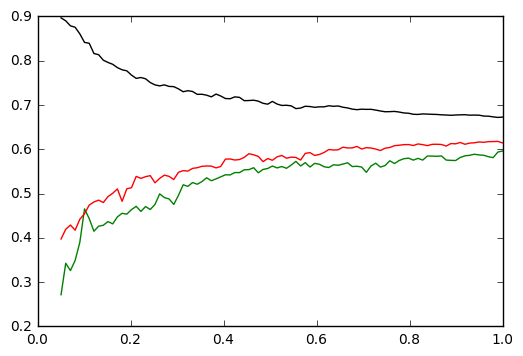

Mejora para max_depth: 6


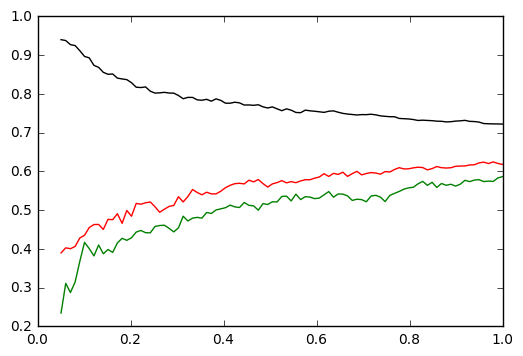

Mejora para max_depth: 7


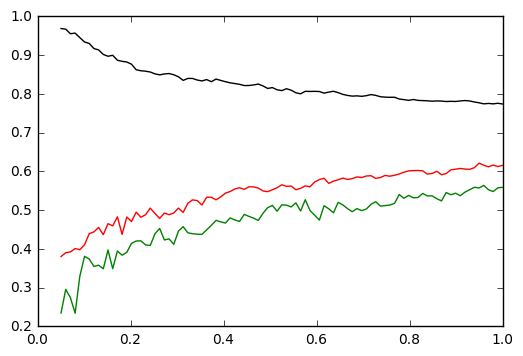

Mejora para max_depth: 8


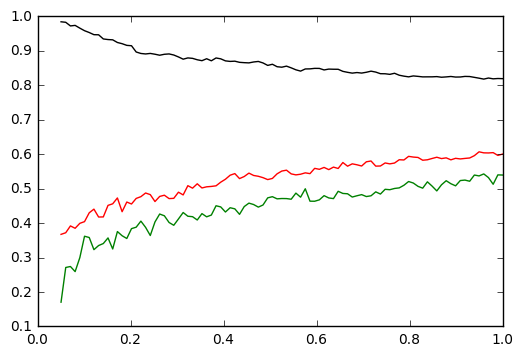

Mejora para max_depth: 13


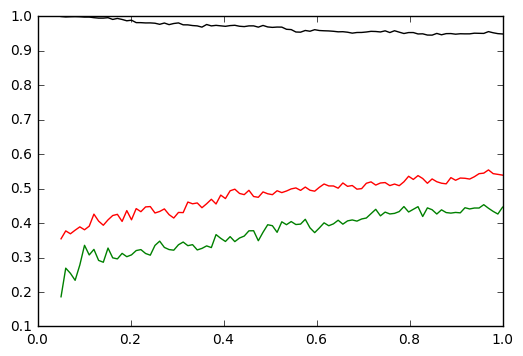

Mejora para SVR de grado: 0


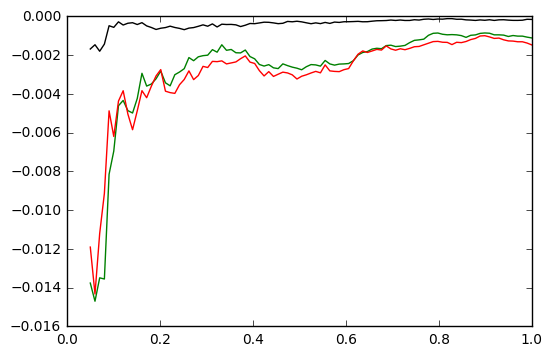

Mejora para SVR de grado: 1


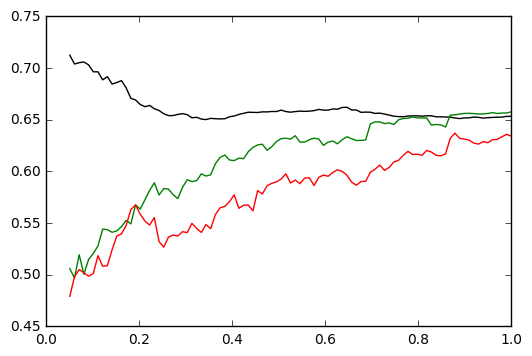

Mejora para SVR de grado: 2


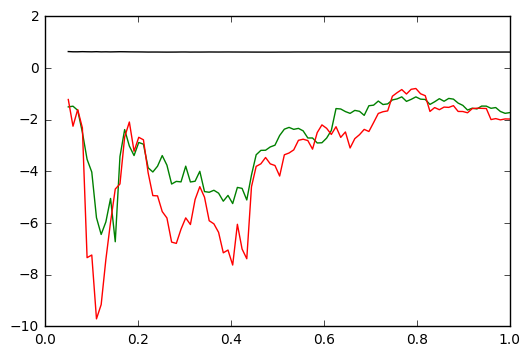

In [157]:
k=0
for a in depths:
    print "Mejora para max_depth: "+str(a)
    training=scores[0,:,k,0]
    test=scores[0,:,k,1]
    test2=scores[0,:,k,2]
    line, = plt.plot(decimals, training, linewidth=1, color='black')
    line, = plt.plot(decimals, test, linewidth=1, color='green')
    line, = plt.plot(decimals, test2, linewidth=1, color='red')
    plt.show()
    k=k+1
k=0
for a in degrees:
    print "Mejora para SVR de grado: "+str(a)
    training=scores[1,:,k,0]
    test=scores[1,:,k,1]
    test2=scores[1,:,k,2]
    line, = plt.plot(decimals, training, linewidth=1, color='black')
    line, = plt.plot(decimals, test, linewidth=1, color='green')
    line, = plt.plot(decimals, test2, linewidth=1, color='red')
    plt.show()
    k=k+1

In [178]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import random

decimals=np.linspace(0,1,100)
decimals=decimals[5:]
seeds=[5642,75543,44654,4427,43311, 9511, 3543, 7665, 45367, 14454]
depths=[1,2,3,4,5,6,7,8,13]
degrees=[0,1, 2]
scores2=np.zeros((1,len(decimals),len(depths),3))
j=0
k=0
for u in decimals:
    print u
    for seed in seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=seed)
        X_train = X_train[: int(len(X_train) * u)]
        y_train = y_train[: int(len(y_train) * u)]
        X_train.reset_index(drop=True, inplace=True)
        [X_train2, y_train2]=neighbors_expand(X_train, y_train, 3)
        X_train2=pd.DataFrame(X_train2)
        y_train2=pd.DataFrame(y_train2)
        X_train2.append(X_train)
        y_train2.append(y_train)
        k=0
        for a in depths:
            regr = RandomForestRegressor(max_depth=a) 
            regr.fit(X_train, y_train.values.ravel())
            scores2[0,j,k,0]=scores2[0,j,k,0]+regr.score(X_train, y_train)/10
            scores2[0,j,k,1]=scores2[0,j,k,1]+regr.score(X_test, y_test)/10
            regr.fit(X_train2, y_train2.values.ravel())
            scores2[0,j,k,2]=scores2[0,j,k,2]+regr.score(X_test, y_test)/10
            k=k+1
        k=0
    j=j+1

0.0505050505051
0.0606060606061
0.0707070707071
0.0808080808081
0.0909090909091
0.10101010101
0.111111111111
0.121212121212
0.131313131313
0.141414141414
0.151515151515
0.161616161616
0.171717171717
0.181818181818
0.191919191919
0.20202020202
0.212121212121
0.222222222222
0.232323232323
0.242424242424
0.252525252525
0.262626262626
0.272727272727
0.282828282828
0.292929292929
0.30303030303
0.313131313131
0.323232323232
0.333333333333
0.343434343434
0.353535353535
0.363636363636
0.373737373737
0.383838383838
0.393939393939
0.40404040404
0.414141414141
0.424242424242
0.434343434343
0.444444444444
0.454545454545
0.464646464646
0.474747474747
0.484848484848
0.494949494949
0.505050505051
0.515151515152
0.525252525253
0.535353535354
0.545454545455
0.555555555556
0.565656565657
0.575757575758
0.585858585859
0.59595959596
0.606060606061
0.616161616162
0.626262626263
0.636363636364
0.646464646465
0.656565656566
0.666666666667
0.676767676768
0.686868686869
0.69696969697
0.707070707071
0.717171717

Mejora para max_depth: 1


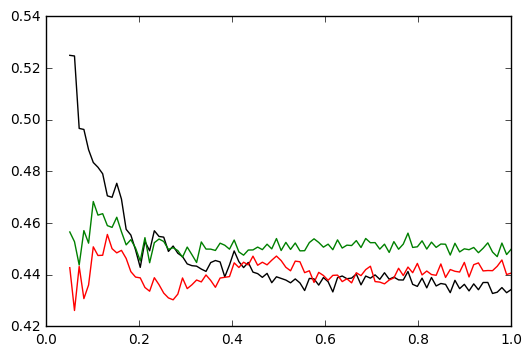

Mejora para max_depth: 2


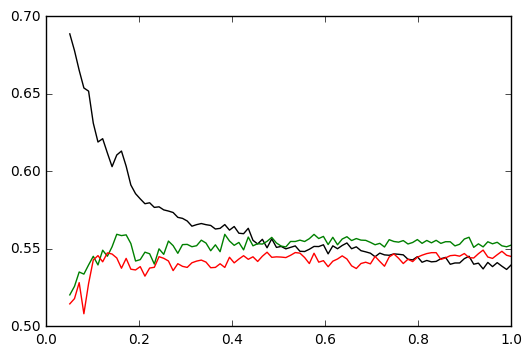

Mejora para max_depth: 3


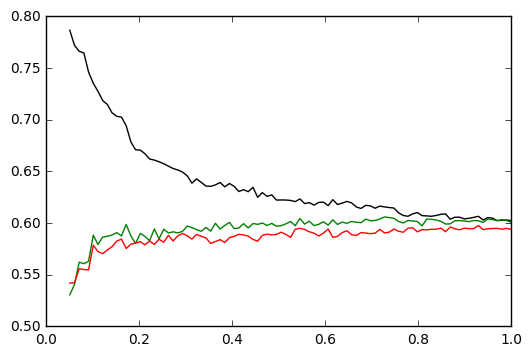

Mejora para max_depth: 4


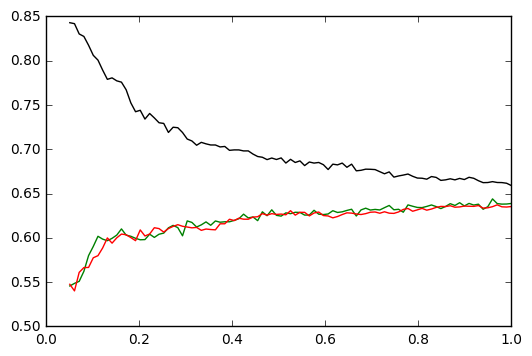

Mejora para max_depth: 5


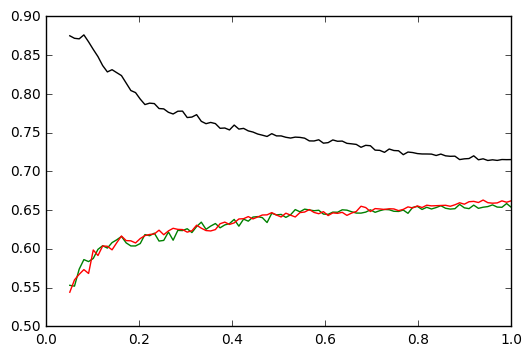

Mejora para max_depth: 6


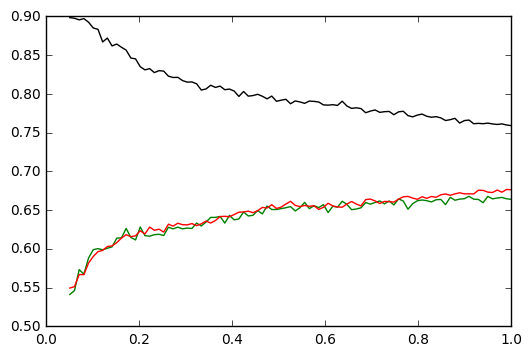

Mejora para max_depth: 7


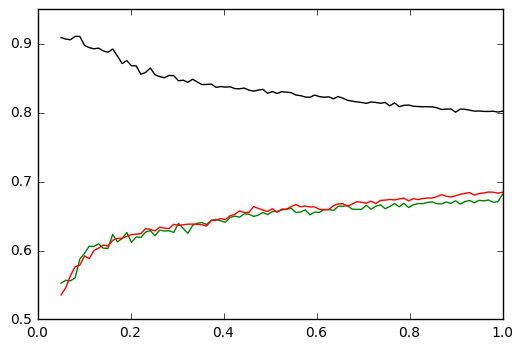

Mejora para max_depth: 8


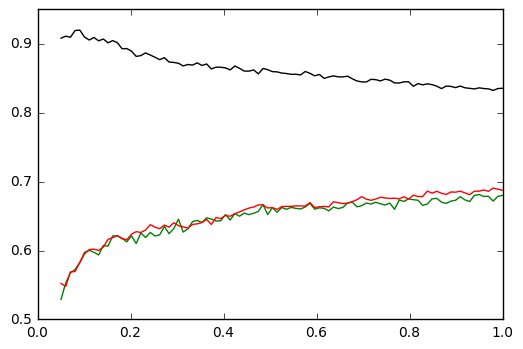

Mejora para max_depth: 13


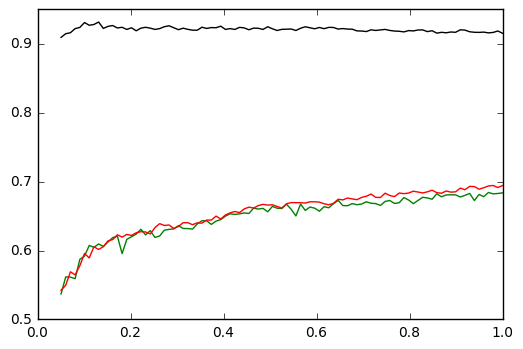

In [179]:
k=0
for a in depths:
    print "Mejora para max_depth: "+str(a)
    training=scores2[0,:,k,0]
    test=scores2[0,:,k,1]
    test2=scores2[0,:,k,2]
    line, = plt.plot(decimals, training, linewidth=1, color='black')
    line, = plt.plot(decimals, test, linewidth=1, color='green')
    line, = plt.plot(decimals, test2, linewidth=1, color='red')
    plt.show()
    k=k+1

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import random

decimals=np.linspace(0,1,100)
decimals=decimals[5:]
seeds=[5642,75543,44654,4427,43311, 9511, 3543, 7665, 45367, 14454]
depths=[7, 9, 11, 13, 15, 17, 19, 21]
degrees=[0,1, 2]
nsn=[3, 5, 9, 17]
scores3=np.zeros((len(nsn),len(decimals),len(depths),3))
j=0
k=0
for u in decimals:
    print u
    for seed in seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=seed)
        X_train = X_train[: int(len(X_train) * u)]
        y_train = y_train[: int(len(y_train) * u)]
        X_train.reset_index(drop=True, inplace=True)
        pairs=neighbors_expand_arr(X_train, y_train, nsn)
        s=0
        for X_train2, y_train2 in pairs:
            X_train2=pd.DataFrame(X_train2)
            y_train2=pd.DataFrame(y_train2)
            X_train2.append(X_train)
            y_train2.append(y_train)
            k=0
            for a in depths:
                regr = RandomForestRegressor(max_depth=a) 
                regr.fit(X_train, y_train.values.ravel())
                scores3[s,j,k,0]=scores3[s,j,k,0]+regr.score(X_train, y_train)/10
                scores3[s,j,k,1]=scores3[s,j,k,1]+regr.score(X_test, y_test)/10
                regr.fit(X_train2, y_train2.values.ravel())
                scores3[s,j,k,2]=scores3[s,j,k,2]+regr.score(X_test, y_test)/10
                k=k+1
            s=s+1
    j=j+1

0.0505050505051
0.0606060606061
0.0707070707071
0.0808080808081
0.0909090909091
0.10101010101
0.111111111111
0.121212121212
0.131313131313
0.141414141414
0.151515151515
0.161616161616
0.171717171717
0.181818181818
0.191919191919
0.20202020202
0.212121212121
0.222222222222
0.232323232323
0.242424242424
0.252525252525
0.262626262626
0.272727272727
0.282828282828
0.292929292929
0.30303030303
0.313131313131
0.323232323232
0.333333333333
0.343434343434
0.353535353535
0.363636363636
0.373737373737
0.383838383838
0.393939393939
0.40404040404


KeyboardInterrupt: 

In [1]:
type(X)

NameError: name 'X' is not defined